# INF8775 TP2

In [1]:
import torch
import math

if not torch.cuda.is_available():
    import numpy as np
else:
    import cupy as np

import matplotlib.pyplot as plt


[[ 142 1862]
 [ 877 1002]
 [1669 1229]
 ...
 [1408 1503]
 [1766 1403]
 [1752  740]]


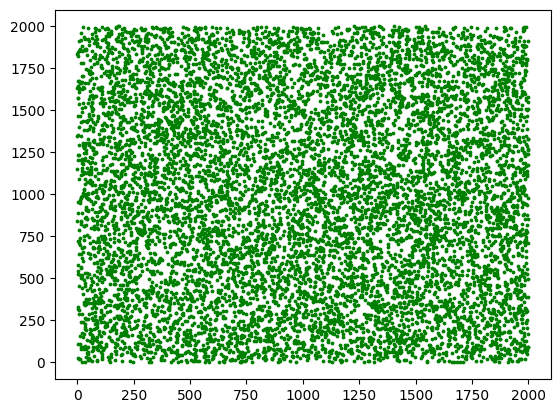

In [16]:
def load_file(file: str):
    with open(file) as f:
        data = f.read().replace('\t', ' ').splitlines()
        N = int(data[0])
        oneLineMatrix = " ".join(data[1:]).split(' ')
        matrix = np.array(list(map(int, oneLineMatrix))).reshape(N, 2)
    return N, matrix


file = "data/N10000_0"
n, m = load_file(file)
# print(n)
print(m)
plt.scatter(m[:, 0], m[:, 1], color="green", s=3)
plt.show()


In [10]:

def euclidianDist(a, b):
    sq = (a[0] - b[0])**2 + (a[1] - b[1])**2
    return math.floor(np.sqrt(sq))


print(m[0], m[3])
euclidianDist(m[0], m[3])


[1558 1074] [ 927 1670]


867

## Greedy

In [17]:
import copy


def greeddyTSP(T: np.ndarray):
    result = [0]
    cityList = copy.deepcopy(T)
    dist = 0
    # print(cityList)
    idx = 0
    i = 0
    while True:
        city = cityList[idx]
        cityList = np.delete(cityList, idx, axis=0)
        if (cityList.size == 0):
            return result, dist
        distances = np.array([euclidianDist(c, city) for c in cityList])
        dist += min(distances)
        # print(distances)
        idx = np.argmin(distances)
        # print(x)
        y = np.argmin(np.array([euclidianDist(c, cityList[idx]) for c in T]))

        # print(y)
        result.append(y)
        # print(f"{i = :2d} | Distances : {distances}")
        # print(f"   argmin in {idx = :2d}, city in {cityList[idx]}, global index {y = :2d}")
        # print(f"{abs(T - cityList[idx]) = }")
        i += 1


indexes, dist = greeddyTSP(m)
dist += euclidianDist(m[indexes[0]], m[indexes[-1]])
print(f"Distance : {dist}")


KeyboardInterrupt: 

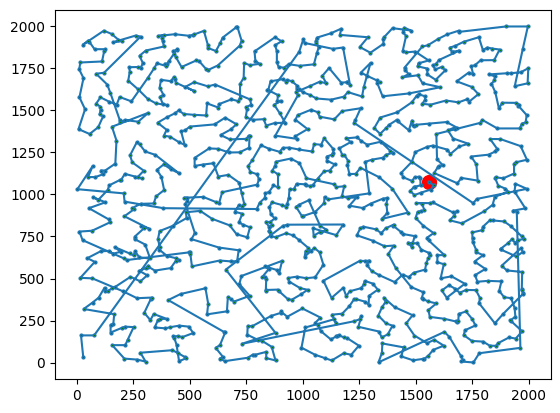

In [8]:
X, Y = [], []
for x in indexes:
    X.append(m[x, 0])
    Y.append(m[x, 1])

plt.plot(X, Y, marker="o", markersize=2, markerfacecolor="green")
plt.scatter(X[0], Y[0], color="red", s=100, marker="o")
plt.show()
# plt.scatter(X, Y, color="green", s=1)
# plt.show()


## Dynamic programming

In [6]:
S = set(range(1, n))
K = S - {1}
print(K, S)


{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

In [7]:
cityList = m

path_dict = {}
def dynProg(d, i: int, S: set):
    if S == {}:
        key = (i, tuple(S))
        return d[key]
    if i in S:
        return math.inf
    min_pt, min_dist = -1, math.inf
    for j in S:
        dij = euclidianDist(cityList[i], cityList[j])
        S_ = S - {j}
        key = (i, tuple(S_))
        if key not in d:
            d[key] = dynProg(d, j, S_)
        dist = dij + d[key]
        if dist < min_dist :
            min_pt, min_dist = j, dist
    key = (i, tuple(S))
    path_dict[key] = min_pt
    d[key] = min_dist
    return min_dist


S = set(range(1, n))
d = {}
for i in S:
    d[(i, tuple())] = euclidianDist(cityList[0], cityList[i])

print(S)
print(d)
h = dynProg(d, 0, S)
min_pt, min_dist = -1, math.inf
for j in S:
    dij = euclidianDist(cityList[0], cityList[j])
    S_ = S - {j}
    key = (0, tuple(S_))
    if key not in d:
        d[key] = dynProg(d, j, S_)
    dist = dij + d[key]
    if dist < min_dist :
        min_pt, min_dist = j, dist
d[0, tuple(S)] = min_dist

for k, v in d.items():
    print(f"{k} : {v}")
print(f"Paths values : ")
for k, v in path_dict.items():
    print(f"{k} : {v}")
print(d[0, tuple(S)])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

KeyboardInterrupt: 

## Algorithme approximatif

In [ ]:
import sys


class Graph:
    def __init__(self, cityList: np.ndarray):
        N = cityList.shape[0]
        self.size: int = N
        self.v: list[int] = list(range(N))
        edges = np.zeros((N,N), dtype=int)
        for city1 in range(N):
            for city2 in range(city1, N):
                c1, c2 = cityList[city1], cityList[city2]
                edges[city1, city2] = euclidianDist(c1, c2)
                edges[city2, city1] = edges[city1, city2]
        for city in range(N) :
            edges[city, city] = sys.maxsize
        self.e: np.ndarray = edges
    
    def getNeighbors(self, i: int):
        return list(set(range(self.size)) - {i})

g = Graph(m)

def prim(g: Graph):
    x = int(g.e.argmin())
    startEdge = x//g.size, x%g.size
    
    vertices = [startEdge[0], startEdge[1]]
    toCheck = []
    for v in vertices:
        toCheck += g.getNeighbors(v)

[[9223372036854775807                   4                   4
                    5                   2]
 [                  4 9223372036854775807                   5
                    4                   2]
 [                  4                   5 9223372036854775807
                    4                   4]
 [                  5                   4                   4
  9223372036854775807                   4]
 [                  2                   2                   4
                    4 9223372036854775807]]
(0, 4)
